In [1]:
import IAU_baseline.baseline as base
import xarray as xr
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file = os.path.join("..", "example", "hfc_134a_air.nc")
ds = xr.open_dataset(file)
df = ds.to_dataframe().reset_index()
df["datetime"] = df["time"].apply(dt.datetime.utcfromtimestamp)

In [3]:
baseline = base.find_base(func=base.fct.higher, x_val = df["datetime"], y_val = df["HFC-134a_C"], y_err = df["HFC-134a_std_stdev"] , flag= None,
                        direction='p', verbose=True, plot= False, ctrl_plots=False, limit= 0.1,
                        stop_rel=True, 
                        post_prc_filter=True)
baseline = ["pollution event" if x > 0 else "baseline" for x in baseline[0]]
df["Classification"] = baseline

Found X axis as datetime, converting to fractional year using datetime_to_fractionalyear from toolpac.conv.times
List 'flag' initialized. All elements set to 0.

Limit set to  10.0 %.

X axis first entry seems to contain a large value. Using offset for fitting.


c:\Users\diede\miniforge\envs\mytools\Lib\site-packages\IAU_baseline\baseline.py:104: UserWarning: WARNING: Different occurence of NaN found in y_val and y_err. This may cause issues.

  warnings.warn('WARNING: Different occurence of NaN found in y_val and y_err. This may cause issues.\n')


Change rel: 21.16 %
 Value of new stdv: 9.640146872943795 and stop criterion: 0.1.
 Difference: 2.5871972495392317.
iteration 1: 116 p outliers found.
Change rel: 12.96 %
 Value of new stdv: 8.312436165632075 and stop criterion: 0.1.
 Difference: 1.237821323864761.
iteration 2: 139 p outliers found.
Change rel: 11.63 %
 Value of new stdv: 7.223045045787823 and stop criterion: 0.1.
 Difference: 0.9502393741878707.
iteration 3: 120 p outliers found.
Change rel: 10.71 %
 Value of new stdv: 6.385313705008934 and stop criterion: 0.1.
 Difference: 0.766062212301593.
iteration 4: 102 p outliers found.
Change rel: 10.68 %
 Value of new stdv: 5.65306113101974 and stop criterion: 0.1.
 Difference: 0.6758123227226571.
iteration 5: 111 p outliers found.
Change rel: 7.39 %
 Value of new stdv: 5.1673044526842675 and stop criterion: 0.1.
 Difference: 0.4122172267438984.
iteration 6: 0 p outliers found.
Fit result:  [153.83740153  38.89966298 -25.35876355 -22.01211273 -15.52911801
  -0.27110713  10.15

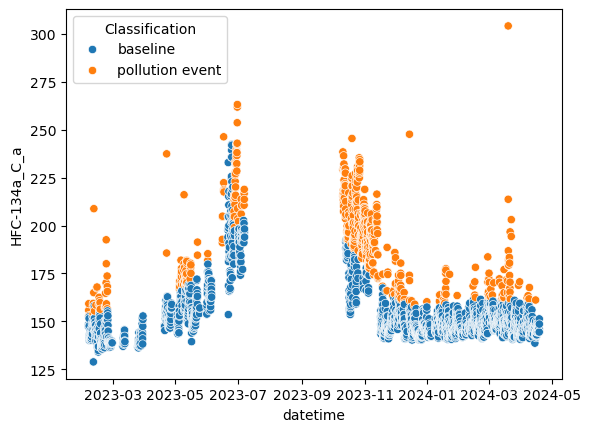

In [4]:
sns.scatterplot(x=df["datetime"], y=df["HFC-134a_C_a"], hue=df["Classification"])
plt.show()